In [17]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [20]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 93s 94ms/step - loss: 0.7326 - accuracy: 0.5626 - val_loss: 0.5822 - val_accuracy: 0.6290
Epoch 2/20
990/990 [==============================] - 93s 94ms/step - loss: 0.5465 - accuracy: 0.7253 - val_loss: 0.4429 - val_accuracy: 0.8185
Epoch 3/20
990/990 [==============================] - 93s 94ms/step - loss: 0.3708 - accuracy: 0.8354 - val_loss: 0.2568 - val_accuracy: 0.9032
Epoch 4/20
990/990 [==============================] - 95s 96ms/step - loss: 0.2679 - accuracy: 0.8970 - val_loss: 0.1807 - val_accuracy: 0.9476
Epoch 5/20
990/990 [==============================] - 93s 94ms/step - loss: 0.1917 - accuracy: 0.9303 - val_loss: 0.2207 - val_accuracy: 0.9315
Epoch 6/20
990/990 [==============================] - 93s 94ms/step - loss: 0.1749 - accuracy: 0.9343 - val_loss: 0.1249 - val_accuracy: 0.9597
Epoch 7/20
990/990 [==============================] - 95s 96ms/step - loss: 0.1238 - accur

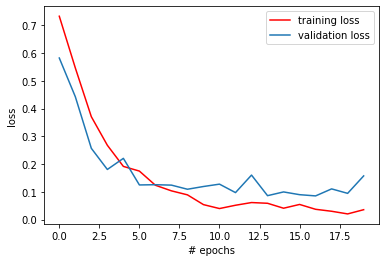

In [21]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

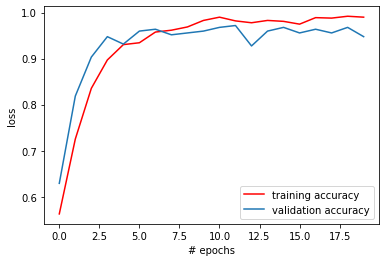

In [22]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 6s 44ms/step
[0.14019694376358952, 0.9637681245803833]
